data from https://www.kaggle.com/paresh2047/uci-semcom

code from https://www.kaggle.com/malepatiyogeshkumar/anomalydetection

# 데이터 다운로드

In [1]:
!wget https://github.com/dhrim/hongik_2021/raw/master/material/deep_learning/uci_secom_dataset.zip

--2020-11-07 01:53:23--  https://github.com/dhrim/hongik_2021/raw/master/material/deep_learning/uci_secom_dataset.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/hongik_2021/master/material/deep_learning/uci_secom_dataset.zip [following]
--2020-11-07 01:53:23--  https://raw.githubusercontent.com/dhrim/hongik_2021/master/material/deep_learning/uci_secom_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2127320 (2.0M) [application/zip]
Saving to: ‘uci_secom_dataset.zip’

uci_secom_dataset.z 100%[===================>]   2.03M  9.20MB/s    in 0.2s    

2020-11-07 01:53:25 (9.20 MB/s) 

In [2]:
!unzip uci_secom_dataset.zip

Archive:  uci_secom_dataset.zip
  inflating: uci-secom.csv           


In [3]:
!ls -alh

total 7.9M
drwxr-xr-x 1 root root 4.0K Nov  7 01:53 .
drwxr-xr-x 1 root root 4.0K Nov  7 01:51 ..
drwxr-xr-x 1 root root 4.0K Nov  3 17:17 .config
drwxr-xr-x 1 root root 4.0K Oct 28 16:30 sample_data
-rw-r--r-- 1 root root 5.8M Oct  1  2019 uci-secom.csv
-rw-r--r-- 1 root root 2.1M Nov  7 01:53 uci_secom_dataset.zip


In [4]:
%%shell
wc uci-secom.csv
head uci-secom.csv

   1568    3135 6055583 uci-secom.csv
Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 데이터 읽기

In [131]:
df = pd.read_csv("uci-secom.csv")
df.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


labeling 컬럼

In [76]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

# 결측치 처리

In [132]:
print(df.isnull())
missing_count = df.isnull().sum()
print(missing_count)

       Time      0      1      2      3  ...    586    587    588    589  Pass/Fail
0     False  False  False  False  False  ...   True   True   True   True      False
1     False  False  False  False  False  ...  False  False  False  False      False
2     False  False  False  False  False  ...  False  False  False  False      False
3     False  False  False  False  False  ...  False  False  False  False      False
4     False  False  False  False  False  ...  False  False  False  False      False
...     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...        ...
1562  False  False  False  False  False  ...  False  False  False  False      False
1563  False  False  False  False  False  ...  False  False  False  False      False
1564  False  False  False  False  False  ...  False  False  False  False      False
1565  False  False  False  False  False  ...  False  False  False  False      False
1566  False  False  False  False  False  ...  False  False  False  False    

누락된 수가 100개 이상인 컬럼 추리기

In [133]:
too_much_missing_column = []

for key, count in missing_count.items():
  if count>100:
    print(key, count)
    too_much_missing_column.append(key)


72 794
73 794
85 1341
109 1018
110 1018
111 1018
112 715
157 1429
158 1429
220 1341
244 1018
245 1018
246 1018
247 715
292 1429
293 1429
345 794
346 794
358 1341
382 1018
383 1018
384 1018
385 715
492 1341
516 1018
517 1018
518 1018
519 715
546 260
547 260
548 260
549 260
550 260
551 260
552 260
553 260
554 260
555 260
556 260
557 260
562 273
563 273
564 273
565 273
566 273
567 273
568 273
569 273
578 949
579 949
580 949
581 949


결측치가 100개 이상인 컬럼 삭제

In [134]:
df.drop(too_much_missing_column, axis = 1, inplace = True)

In [135]:
missing_count = df.isnull().sum()
for key, count in missing_count.items():
  print(key, count)


Time 0
0 6
1 7
2 14
3 14
4 14
5 14
6 14
7 9
8 2
9 2
10 2
11 2
12 2
13 3
14 3
15 3
16 3
17 3
18 3
19 10
20 0
21 2
22 2
23 2
24 2
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 24
41 24
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 4
54 4
55 4
56 4
57 4
58 4
59 7
60 6
61 6
62 6
63 7
64 7
65 7
66 6
67 6
68 6
69 6
70 6
71 6
74 6
75 24
76 24
77 24
78 24
79 24
80 24
81 24
82 24
83 1
84 12
86 0
87 0
88 0
89 51
90 51
91 6
92 2
93 2
94 6
95 6
96 6
97 6
98 6
99 6
100 6
101 6
102 6
103 2
104 2
105 6
106 6
107 6
108 6
113 0
114 0
115 0
116 0
117 0
118 24
119 0
120 0
121 9
122 9
123 9
124 9
125 9
126 9
127 9
128 9
129 9
130 9
131 9
132 8
133 8
134 8
135 5
136 6
137 7
138 14
139 14
140 14
141 14
142 14
143 9
144 2
145 2
146 2
147 2
148 2
149 3
150 3
151 3
152 3
153 3
154 3
155 10
156 0
159 2
160 2
161 2
162 2
163 2
164 2
165 2
166 2
167 2
168 2
169 2
170 1
171 1
172 1
173 1
174 1
175 1
176 1
177 1
178 24
179 1
180 1
181 1
182 1
183 1
184 1
185 1
186 1
187 1

결측치를 0으로 치환

In [136]:
df.replace(np.nan, 0, inplace = True)
df.isnull().any().any()

False

In [137]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,558,559,560,561,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,6.6926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0344,0.4385,0.1039,42.3877,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,8.8370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7910,2.9799,9.5796,0.1096,0.0078,0.0026,7.116,0.9634,0.1745,0.0375,18.1087,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,6.4568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1538,2.9667,9.3046,0.1096,0.0078,0.0026,7.116,1.5021,0.3718,0.1233,24.7524,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,...,6.4865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1565,3.2465,7.7754,0.1096,0.0078,0.0026,7.116,1.1613,0.7288,0.2710,62.7572,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,...,6.3745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0579,1.9999,9.4805,0.1096,0.0078,0.0026,7.116,0.9778,0.2156,0.0461,22.0500,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


# Normalization

In [138]:
df.drop(['Time'], axis = 1, inplace = True)  # min, max 연산이 가능하도록 Time 컬럼을 삭제

normalized_df=(df-df.min())/(df.max()-df.min())

In [139]:
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,558,559,560,561,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,0.903043,0.900774,0.944916,0.379841,0.001220,1.0,0.755216,0.965785,0.905880,0.542479,0.358362,0.960093,0.744140,NaN,0.407019,0.502918,0.097633,0.982941,0.892386,0.963756,0.814395,0.242124,0.797675,0.481224,0.538057,0.647599,0.863698,0.398104,0.824561,0.575945,0.572431,0.732474,0.789717,0.407474,0.846847,0.681689,0.984408,0.975801,0.983450,0.880976,...,0.368353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.312600,1.000000,0.446383,0.925676,0.325,0.553191,0.338144,0.684082,0.408401,0.233116,0.419205,0.795609,0.642926,0.011995,0.116901,0.011971,0.150986,0.011285,0.112244,0.981758,0.024759,0.033493,0.023796,0.141186,0.000000,0.000000,0.000000,0.0
1,0.922365,0.866043,0.963354,0.393982,0.000744,1.0,0.791811,0.969673,0.903526,0.412315,0.228669,0.977559,0.737183,NaN,0.519520,0.502753,0.090018,0.985073,0.887241,0.959276,0.740957,0.238978,0.712274,0.525355,0.455345,0.938169,0.981245,0.964903,0.878334,0.645581,0.737285,0.711244,0.803998,0.419772,0.847560,0.681944,0.983558,0.955277,0.989881,0.885516,...,0.543008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.272176,0.729920,0.371602,0.925676,0.325,0.553191,0.338144,0.637127,0.162522,0.084137,0.179091,0.799892,0.826067,0.005277,0.093239,0.005750,0.102807,0.004934,0.068396,0.984504,0.046790,0.052632,0.044759,0.221387,0.251564,0.209790,0.282386,0.0
2,0.873750,0.899348,0.944345,0.457065,0.001355,1.0,0.738771,0.965008,0.871529,0.448168,0.411832,0.976340,0.742590,NaN,0.486824,0.505145,0.090547,0.982331,0.893811,0.965404,0.849836,0.238104,0.738940,0.480961,0.445790,0.948944,0.988650,0.989554,0.861788,0.664550,0.608208,0.749022,0.802593,0.370910,0.839084,0.680125,0.993657,0.968809,0.958311,0.889219,...,0.349148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327310,0.726687,0.360934,0.925676,0.325,0.553191,0.338144,0.993387,0.346279,0.276643,0.244796,0.799922,0.596317,0.017006,0.057042,0.018066,0.077769,0.015949,0.050771,0.972538,0.032942,0.037321,0.031968,0.629073,0.605757,0.517483,0.112383,1.0
3,0.890467,0.871229,0.949797,0.244894,0.001185,1.0,0.806460,0.946345,0.898454,0.319564,0.359499,0.977762,0.741966,NaN,0.491403,0.511911,0.094222,0.983652,0.891270,0.960615,0.808915,0.235237,0.724308,0.443066,0.454757,0.950029,0.976130,0.955045,0.807873,0.753154,0.726412,0.703792,0.804048,0.371762,0.845057,0.680137,0.986540,0.959336,0.980410,0.877460,...,0.351567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.327721,0.795224,0.301615,0.925676,0.325,0.553191,0.338144,0.768005,0.678774,0.608032,0.620654,0.783557,0.594043,0.012838,0.050282,0.010993,0.055956,0.012198,0.043312,0.978815,0.021611,0.023923,0.020688,0.309942,0.186483,0.153846,0.100153,0.0
4,0.903434,0.879298,0.964626,0.357067,0.001376,1.0,0.776750,0.960342,0.907450,0.392050,0.315131,0.971669,0.742312,NaN,0.540562,0.509854,0.100505,0.988526,0.888709,0.960253,0.763975,0.234118,0.720752,0.485779,0.516127,0.931950,0.969992,0.949862,0.806589,0.898750,0.945633,0.681209,0.817460,0.375566,0.840674,0.680546,0.991763,0.973449,0.974304,0.910387,...,0.342445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.312737,0.489871,0.367758,0.925676,0.325,0.553191,0.338144,0.646650,0.200801,0.103433,0.218069,0.788872,0.595294,0.011729,0.073099,0.012653,0.090288,0.011097,0.069148,0.941546,1.000000,1.000000,1.000000,0.309942,0.186483,0.153846,0.100153,0.0


컬럼 전체의 값이 0.0인 것은 다시 NaN이 되었다. 이를 0.0으로 치환

In [83]:
normalized_df.replace(np.nan, 0, inplace = True)
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,558,559,560,561,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,0.903043,0.900774,0.944916,0.379841,0.001220,1.0,0.755216,0.965785,0.905880,0.542479,0.358362,0.960093,0.744140,0.0,0.407019,0.502918,0.097633,0.982941,0.892386,0.963756,0.814395,0.242124,0.797675,0.481224,0.538057,0.647599,0.863698,0.398104,0.824561,0.575945,0.572431,0.732474,0.789717,0.407474,0.846847,0.681689,0.984408,0.975801,0.983450,0.880976,...,0.368353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312600,1.000000,0.446383,0.925676,0.325,0.553191,0.338144,0.684082,0.408401,0.233116,0.419205,0.795609,0.642926,0.011995,0.116901,0.011971,0.150986,0.011285,0.112244,0.981758,0.024759,0.033493,0.023796,0.141186,0.000000,0.000000,0.000000,0.0
1,0.922365,0.866043,0.963354,0.393982,0.000744,1.0,0.791811,0.969673,0.903526,0.412315,0.228669,0.977559,0.737183,0.0,0.519520,0.502753,0.090018,0.985073,0.887241,0.959276,0.740957,0.238978,0.712274,0.525355,0.455345,0.938169,0.981245,0.964903,0.878334,0.645581,0.737285,0.711244,0.803998,0.419772,0.847560,0.681944,0.983558,0.955277,0.989881,0.885516,...,0.543008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272176,0.729920,0.371602,0.925676,0.325,0.553191,0.338144,0.637127,0.162522,0.084137,0.179091,0.799892,0.826067,0.005277,0.093239,0.005750,0.102807,0.004934,0.068396,0.984504,0.046790,0.052632,0.044759,0.221387,0.251564,0.209790,0.282386,0.0
2,0.873750,0.899348,0.944345,0.457065,0.001355,1.0,0.738771,0.965008,0.871529,0.448168,0.411832,0.976340,0.742590,0.0,0.486824,0.505145,0.090547,0.982331,0.893811,0.965404,0.849836,0.238104,0.738940,0.480961,0.445790,0.948944,0.988650,0.989554,0.861788,0.664550,0.608208,0.749022,0.802593,0.370910,0.839084,0.680125,0.993657,0.968809,0.958311,0.889219,...,0.349148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327310,0.726687,0.360934,0.925676,0.325,0.553191,0.338144,0.993387,0.346279,0.276643,0.244796,0.799922,0.596317,0.017006,0.057042,0.018066,0.077769,0.015949,0.050771,0.972538,0.032942,0.037321,0.031968,0.629073,0.605757,0.517483,0.112383,1.0
3,0.890467,0.871229,0.949797,0.244894,0.001185,1.0,0.806460,0.946345,0.898454,0.319564,0.359499,0.977762,0.741966,0.0,0.491403,0.511911,0.094222,0.983652,0.891270,0.960615,0.808915,0.235237,0.724308,0.443066,0.454757,0.950029,0.976130,0.955045,0.807873,0.753154,0.726412,0.703792,0.804048,0.371762,0.845057,0.680137,0.986540,0.959336,0.980410,0.877460,...,0.351567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327721,0.795224,0.301615,0.925676,0.325,0.553191,0.338144,0.768005,0.678774,0.608032,0.620654,0.783557,0.594043,0.012838,0.050282,0.010993,0.055956,0.012198,0.043312,0.978815,0.021611,0.023923,0.020688,0.309942,0.186483,0.153846,0.100153,0.0
4,0.903434,0.879298,0.964626,0.357067,0.001376,1.0,0.776750,0.960342,0.907450,0.392050,0.315131,0.971669,0.742312,0.0,0.540562,0.509854,0.100505,0.988526,0.888709,0.960253,0.763975,0.234118,0.720752,0.485779,0.516127,0.931950,0.969992,0.949862,0.806589,0.898750,0.945633,0.681209,0.817460,0.375566,0.840674,0.680546,0.991763,0.973449,0.974304,0.910387,...,0.342445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312737,0.489871,0.367758,0.925676,0.325,0.553191,0.338144,0.646650,0.200801,0.103433,0.218069,0.788872,0.595294,0.011729,0.073099,0.012653,0.090288,0.011097,0.069148,0.941546,1.000000,1.000000,1.000000,0.309942,0.186483,0.153846,0.100153,0.0


# numpy로 받고

In [140]:
data = normalized_df.to_numpy()
print(data.shape)
print(data[0])

(1567, 539)
[9.03043485e-01 9.00774301e-01 9.44916324e-01 3.79841362e-01
 1.22041753e-03 1.00000000e+00 7.55215772e-01 9.65785381e-01
 9.05880222e-01 5.42478566e-01 3.58361775e-01 9.60093420e-01
 7.44139850e-01            nan 4.07019159e-01 5.02918379e-01
 9.76331735e-02 9.82940699e-01 8.92385679e-01 9.63756178e-01
 8.14395323e-01 2.42124401e-01 7.97675214e-01 4.81224316e-01
 5.38057107e-01 6.47599074e-01 8.63698363e-01 3.98104142e-01
 8.24560976e-01 5.75944861e-01 5.72430726e-01 7.32474398e-01
 7.89716847e-01 4.07473881e-01 8.46847389e-01 6.81688999e-01
 9.84407518e-01 9.75801444e-01 9.83450352e-01 8.80975907e-01
 7.11681375e-01 1.20953528e-01 1.00000000e+00 9.34852436e-01
 9.21387858e-01 7.39416018e-01 9.15868431e-01 8.65065184e-01
 8.65099059e-01 1.00000000e+00 9.34963934e-01 8.44413622e-01
            nan 9.63895886e-01 9.66074636e-01 9.65258856e-01
 9.93495415e-01 9.88122526e-01 9.70747808e-01 1.38290916e-01
 9.38641183e-01 9.01416219e-01 3.78347064e-01 8.58328597e-02
 4.43502721e

x, y 로 쪼개기

In [141]:
x = data[:, 1:-1]   # 첫째 칼럼 날자 제외. 마지막칼럼 y 제외
y = data[:, -1]     # 마지막 칼럼

레이블링 데이터로 사용될 카테고리 인덱스는 항상 int이어야 한다.

In [143]:
y = y.astype(int)

train, test로 쪼개기

In [144]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7)

In [145]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1096, 537)
(1096,)
(471, 537)
(471,)


In [146]:
print(np.min(train_x), np.max(train_x))
print(np.min(test_x), np.max(test_x))

nan nan
nan nan


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6630: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6631: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


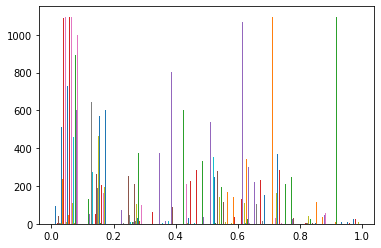

In [147]:
plt.hist(train_x)
plt.show()

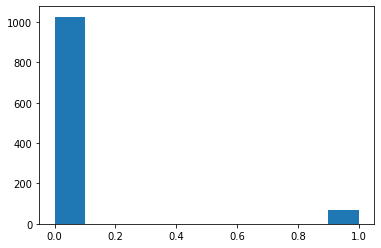

In [148]:
plt.hist(train_y)
plt.show()

# 모델 준비

In [113]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [114]:
model = keras.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape=(train_x.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

In [115]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               107600    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                12864     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 120,594
Trainable params: 120,594
Non-trainable params: 0
_________________________________________________________________


In [116]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

극단적인 클래스간 비균등을 커버하기 위한 class_weight 계산

In [118]:
counts = np.bincount(train_y)
print(counts)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

class_weight = {0: weight_for_0, 1: weight_for_1}
print(class_weight)

[1020   76]
{0: 0.000980392156862745, 1: 0.013157894736842105}


In [119]:
history = model.fit(train_x, train_y, epochs=100, verbose=1, validation_split=0.1, class_weight=class_weight)

Epoch 1/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0014 - acc: 0.4067 - val_loss: 0.4934 - val_acc: 0.9364
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 0.6166 - val_loss: 0.6896 - val_acc: 0.6091
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 0.3590 - val_loss: 0.7156 - val_acc: 0.3455
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 0.6734 - val_loss: 0.8343 - val_acc: 0.1000
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0013 - acc: 0.4736 - val_loss: 0.7882 - val_acc: 0.1455
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 0.5548 - val_loss: 0.4464 - val_acc: 0.9000
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0012 - acc: 0.5365 - val_loss: 0.4309 - val_acc: 0.9091
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 0.0012 - a

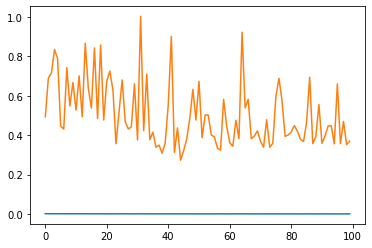

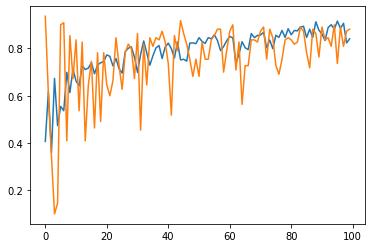

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()


In [122]:
loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)

15/15 [==============================] - 0s 2ms/step - loss: 0.3156 - acc: 0.8854
loss : 0.3156002461910248
acc : 0.8853503465652466


In [125]:
y_ = model.predict(test_x)
print(y_[:10])
predicted = np.argmax(y_, axis=1)
print(test_y)
print(predicted)

[[9.7895616e-01 2.1043818e-02]
 [2.4756773e-01 7.5243223e-01]
 [9.9999154e-01 8.4610811e-06]
 [9.7981513e-01 2.0184901e-02]
 [9.9839348e-01 1.6065425e-03]
 [9.9970812e-01 2.9191506e-04]
 [6.7813599e-01 3.2186404e-01]
 [1.7482500e-01 8.2517493e-01]
 [9.9928927e-01 7.1069301e-04]
 [9.8389959e-01 1.6100382e-02]]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0

# 리포트

In [126]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(test_y, predicted)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[408  35]
 [ 19   9]]
acc: 0.8854
sensitivity: 0.9210
specificity: 0.3214


In [128]:
print(classification_report(test_y, predicted, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       443
           1       0.20      0.32      0.25        28

    accuracy                           0.89       471
   macro avg       0.58      0.62      0.59       471
weighted avg       0.91      0.89      0.90       471

